# Extracción de características
Las técnicas que hemos visto hasta ahora se usan generalmente cuando no tenemos una gran cantidad de variables en nuestro conjunto de datos. Estas son más o menos técnicas de selección de características. En las próximas secciones, trabajaremos con el conjunto de datos Fashion MNIST, que consiste en imágenes que pertenecen a diferentes tipos de ropa, por ejemplo, camisetas, pantalones, bolsos, etc. El conjunto de datos se puede descargar desde la práctica " IDENTIFICAR LA ROPA " problema.

El conjunto de datos tiene un total de 70,000 imágenes, de las cuales 60,000 están en el conjunto de entrenamiento y las 10,000 restantes son imágenes de prueba. Para el alcance de este artículo, trabajaremos solo en las imágenes de capacitación. El archivo del tren está en formato zip. Una vez que extraiga el archivo zip, obtendrá un archivo .csv y una carpeta de tren que incluye estas 60,000 imágenes. La etiqueta correspondiente de cada imagen se puede encontrar en el archivo 'train.csv'.

# 1. Análisis Factorial
Supongamos que tenemos dos variables: Ingresos y Educación. Estas variables potencialmente tendrán una alta correlación ya que las personas con un nivel de educación superior tienden a tener ingresos significativamente más altos, y viceversa.

En la técnica de Análisis Factorial, las variables se agrupan por sus correlaciones, es decir, todas las variables en un grupo particular tendrán una alta correlación entre ellas, pero una baja correlación con las variables de otros grupos. Aquí, cada grupo se conoce como un factor. Estos factores son pequeños en comparación con las dimensiones originales de los datos. Sin embargo, estos factores son difíciles de observar.

Primero leamos todas las imágenes contenidas en la carpeta de entrenamiento:

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('train/*.png')]

In [2]:
images = np.array(images)
images.shape

(60000, 28, 28, 3)

Como puede ver arriba, es una matriz tridimensional. Debemos convertirlo a 1 dimensión, ya que todas las próximas técnicas solo toman una entrada unidimensional. Para hacer esto, necesitamos aplanar las imágenes: 

In [3]:
image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

Ahora creemos un dataframe que contenga los valores de píxeles de cada píxel individual presente en cada imagen, y también sus etiquetas correspondientes (para las etiquetas, haremos uso del archivo train.csv ).

In [4]:
train = pd.read_csv("train.csv")     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

Ahora descompondremos el conjunto de datos usando Análisis Factorial:

In [5]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis (n_components = 3) .fit_transform (df [feat_cols] .values)

n_components define el número de factores en los datos transformados. Después de transformar los datos, es hora de visualizar los resultados:

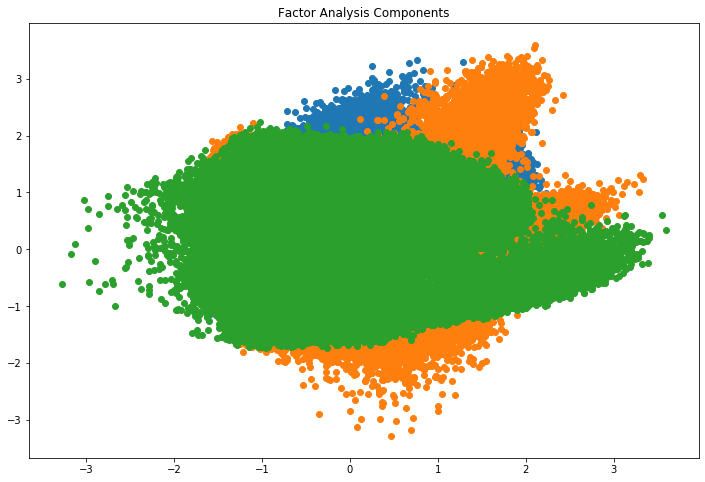

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])
plt.show()

Podemos ver todos los diferentes factores en el gráfico anterior. Aquí, el eje xy el eje y representan los valores de los factores descompuestos. Como se mencionó anteriormente, es difícil observar estos factores individualmente, pero hemos podido reducir con éxito las dimensiones de nuestros datos.

# 2. Análisis de Componente Principal (PCA)
PCA es una técnica que ayuda a extraer un nuevo conjunto de variables de un gran conjunto de variables existente. (Feature Extraction) Estas variables recién extraídas se denominan Componentes principales. Para su referencia rápida, a continuación se detallan algunos de los puntos clave que debe conocer sobre PCA antes de continuar:

- Un componente principal es una combinación lineal de las variables originales.
- Los componentes principales se extraen de tal manera que el primer componente principal explica la varianza máxima en el conjunto de datos
- El segundo componente principal intenta explicar la varianza restante en el conjunto de datos y no está correlacionado con el primer componente principal
- El tercer componente principal intenta explicar la varianza que no se explica por los dos primeros componentes principales, etc.

Antes de continuar, trazaremos al azar algunas de las imágenes de nuestro conjunto de datos:

<Figure size 432x288 with 0 Axes>

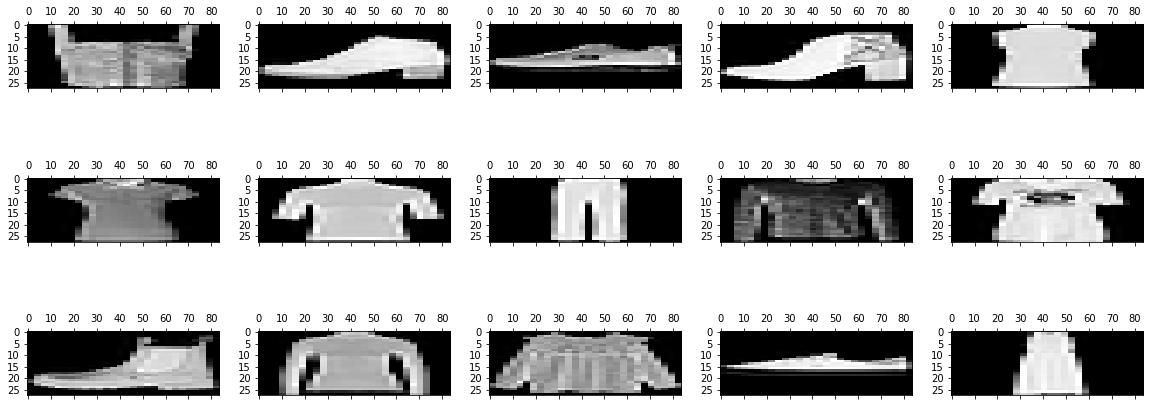

In [20]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,8))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))
plt.show()

Implementemos PCA usando Python y transformemos el conjunto de datos:

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

En este caso, n_components decidirá el número de componentes principales en los datos transformados. Visualicemos cuánta varianza se puede explicar  usando estos 4 componentes. Usaremos explained_variance_ratio_ para calcular lo mismo.

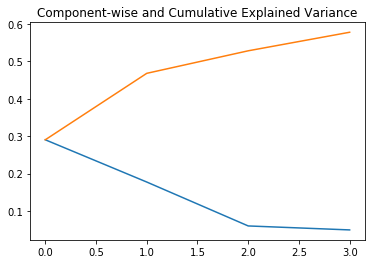

In [19]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.show()

En el gráfico anterior, la línea azul representa la varianza explicada por componentes, mientras que la línea naranja representa la varianza explicativa acumulativa. Podemos explicar alrededor del 60% de varianza en el conjunto de datos utilizando solo cuatro componentes. Ahora tratemos de visualizar cada uno de estos componentes descompuestos:

Text(0.5, 0.98, '4-Component PCA')

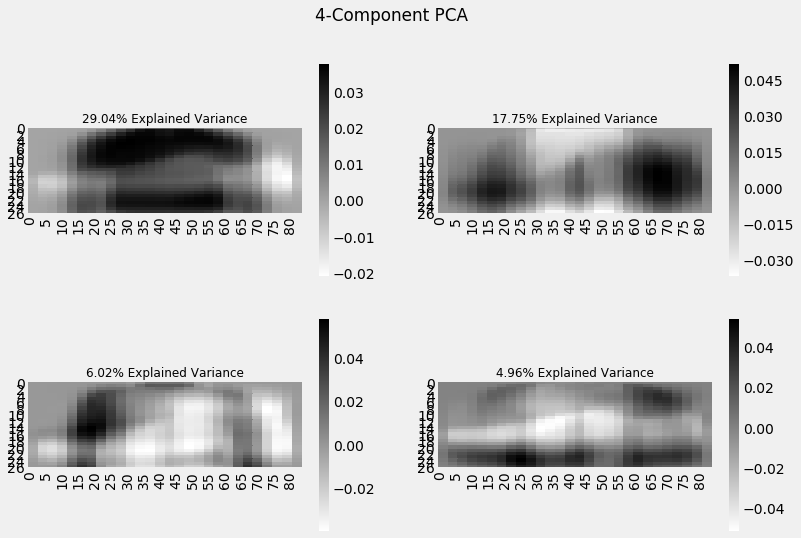

In [21]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

Cada dimensión adicional que agreguemos a la técnica PCA captura cada vez menos la varianza en el modelo. El primer componente es el más importante, seguido del segundo, luego el tercero, y así sucesivamente.

# 3. Descomposición Singular de Valores  (SVD)
También podemos usar la Descomposición de valor singular  (SVD) para descomponer nuestro conjunto de datos original en sus componentes, lo que resulta en una reducción de la dimensionalidad. 

SVD descompone las variables originales en tres matrices constituyentes. Se utiliza esencialmente para eliminar características redundantes del conjunto de datos. Utiliza el concepto de valores propios (eigen values) y vectores propios (eigen vectors) para determinar esas tres matrices. SVD puede ser aplicado para reducir las dimensiones en nuestro conjunto de datos.

Implementemos SVD y descompongamos nuestras variables originales:

In [22]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

Visualicemos las variables transformadas trazando los dos primeros componentes principales:

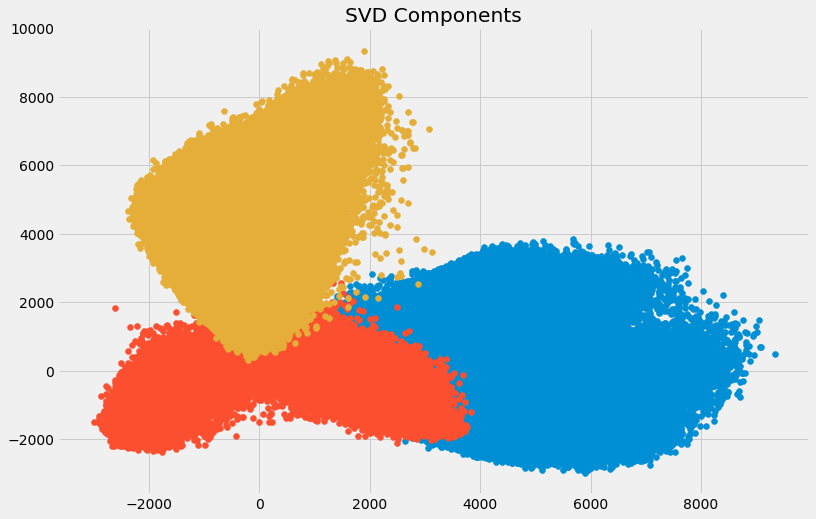

In [24]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])
plt.show()

# 4. Análisis de Componente Independiente  (ICA)
El análisis de componentes independientes (ICA) se basa en la teoría de la información y también es una de las técnicas de reducción de dimensionalidad más utilizadas. La principal diferencia entre PCA e ICA es que PCA busca factores no correlacionados mientras que ICA busca factores independientes.

Si dos variables no están correlacionadas, significa que no hay una relación lineal entre ellas. Si son independientes, significa que no dependen de otras variables. Por ejemplo, la edad de una persona es independiente de lo que come, o de la cantidad de televisión que ve.

Este algoritmo supone que las variables dadas son mezclas lineales de algunas variables latentes desconocidas. También supone que estas variables latentes son mutuamente independientes , es decir, no dependen de otras variables y, por lo tanto, se denominan componentes independientes de los datos observados.

Comparemos visualmente PCA e ICA para obtener una mejor comprensión de cómo son diferentes:

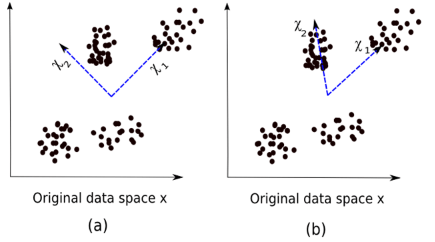

In [28]:
from IPython.display import Image
Image(filename='images/pcavsica.png')

En la imagen anterior,la imagen (a) representa los resultados de PCA, mientras que la imagen (b) representa los resultados de ICA en el mismo conjunto de datos.

La ecuación de PCA es x = Wχ.

Aquí,

- x son las observaciones
- W es la matriz de mezcla
- χ es la fuente o los componentes independientes

Ahora tenemos que encontrar una matriz sin mezcla para que los componentes se vuelvan lo más independientes posible. El método más común para medir la independencia de los componentes es el no gaussiano:

- Según el teorema del límite central, la distribución de la suma de componentes independientes tiende a estar normalmente distribuida (gaussiana).


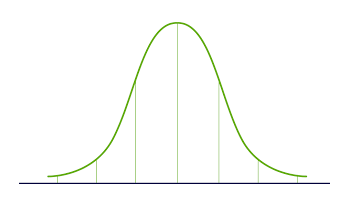

In [29]:
from IPython.display import Image
Image(filename='images/gaussian.png')

- Entonces podemos buscar las transformaciones que maximizan la curtosis de cada componente de los componentes independientes. La curtosis es el momento de tercer orden de la distribución. Para aprender más sobre la curtosis, dirígete  aquí .
- Maximizar la curtosis hará que la distribución no sea gaussiana y, por lo tanto, obtendremos componentes independientes.

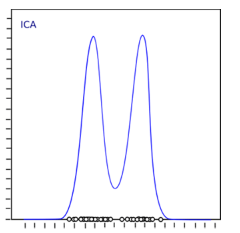

In [30]:
from IPython.display import Image
Image(filename='images/non-gaussian.png')

La distribución anterior no es gaussiana, lo que a su vez hace que los componentes sean independientes. Intentemos implementar ICA en Python:

In [31]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)

Aquí, n_components decidirá el número de componentes en los datos transformados. Hemos transformado los datos en 3 componentes usando ICA. Visualicemos qué tan bien ha transformado los datos:

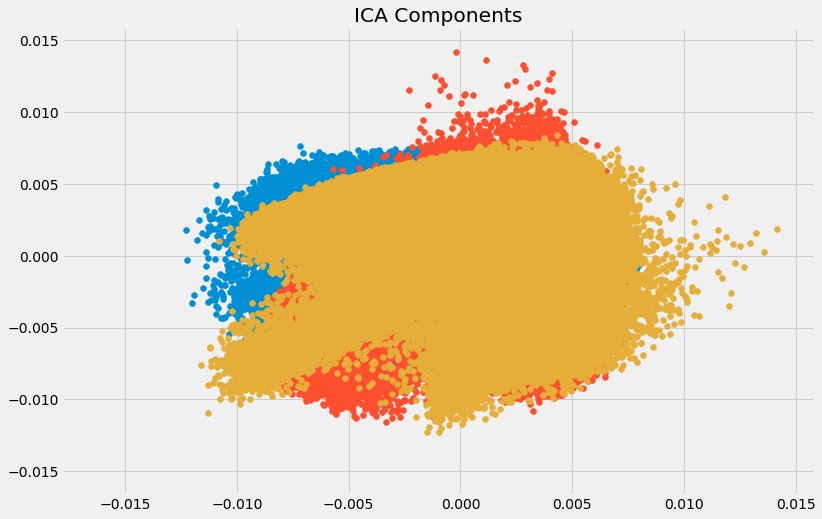

In [32]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])
plt.show()

Los datos se han separado en diferentes componentes independientes que se pueden ver muy claramente en la imagen de arriba. El eje X y el eje Y representan el valor de los componentes independientes descompuestos.

# 5. Métodos basados en proyecciones 
Para comenzar, necesitamos entender qué es la proyección. Supongamos que tenemos dos vectores, el vector a y el vector b , como se muestra a continuación:

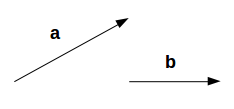

In [33]:
from IPython.display import Image
Image(filename='images/vectors1.png')

Queremos encontrar la proyección de a en b . Deje que el ángulo entre ayb sea ∅. La proyección ( a1 ) se verá así:

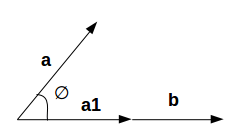

In [34]:
from IPython.display import Image
Image(filename='images/vectors2.png')

a1 es el vector paralelo a b. Entonces, podemos obtener la proyección del vector a sobre el vector b usando la siguiente ecuación:

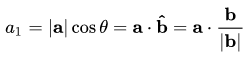

In [35]:
from IPython.display import Image
Image(filename='images/eq1.png')

En esta ecuación tenemos:
- a1 = proyección de a sobre b
- b̂ = vector unitario en la dirección de b

Al proyectar un vector sobre el otro, se puede reducir la dimensionalidad.

En las técnicas de proyección, los datos multidimensionales se representan proyectando sus puntos en un espacio de dimensiones inferiores. Ahora discutiremos diferentes métodos de proyecciones:

- Proyección en direcciones interesantes:
Las direcciones interesantes dependen de problemas específicos pero, en general, las direcciones en las que los valores proyectados no son gaussianos se consideran interesantes.
Similar a ICA (Análisis de Componente Independiente), la proyección busca direcciones que maximicen la curtosis de los valores proyectados como una medida de no gaussianismo.

- Proyecciones sobre Variedad (Manifold)
Hace algún tiempo se pensaba que la Tierra era plana. No importa hacia donde nos dirigieramos en la Tierra, seguía pareciendo plana (ignoremos las montañas por un tiempo). Pero si sigue caminando en una dirección, terminaremos donde comenzamos. Eso no sucedería si la Tierra fuera plana. La Tierra solo se ve plana porque somos minúsculos en comparación con el tamaño de la misma.

Estas pequeñas porciones donde la Tierra se ve plana son Variedades (Manifolds), y si combinamos todos estos Manifolds obtenemos una vista a gran escala de la Tierra, es decir, los datos originales. De manera similar para una curva n-dimensional, las pequeñas piezas planas son Manifolds y una combinación de estos Manifolds nos dará la curva n-dimensional original. Veamos los pasos para la proyección en múltiples:
- Primero buscamos un Manifold que esté cerca de los datos
- Luego se proyectan los datos en ese manifold
- Finalmente para la representación, desplegamos el Manifold. Hay varias técnicas para obtener la variedad, y todas estas técnicas consisten en un enfoque de tres pasos:
- - Recopilar información de cada punto de datos para construir un gráfico que tenga puntos de datos como vértices
- - Transformar el gráfico generado anteriormente en una entrada adecuada para los pasos de incrustación
- - Calcular una ecuación propia (nXn)



Comprendamos la técnica de proyección de un Manifold con un ejemplo.

Si un Manifold es continuamente diferenciable a cualquier orden, se conoce como Manifold suave o diferenciable. ISOMAP es un algoritmo que tiene como objetivo recuperar la representación completa de baja dimensión de un Manifold no lineal. Se supone que el Manifold es suave.

También supone que para cualquier par de puntos en el Manifold, la distancia geodésica (la distancia más corta entre dos puntos en una superficie curva) entre los dos puntos es igual a la distancia euclidiana (la distancia más corta entre dos puntos en una línea recta). Primero visualicemos la distancia geodésica y euclidiana entre un par de puntos:

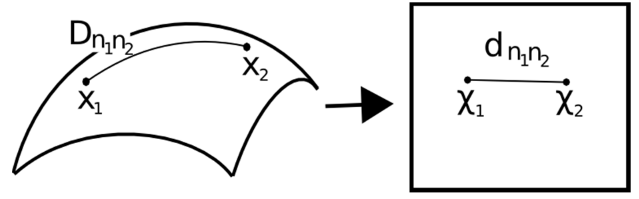

In [37]:
from IPython.display import Image
Image(filename='images/distances.png')

En la gráfica
- Dn1n2 = distancia geodésica entre X1 y X2
- dn1n2 = Distancia euclidiana entre X1 y X2

ISOMAP supone que ambas distancias son iguales. Veamos ahora una explicación más detallada de esta técnica. Como se mencionó anteriormente, todas estas técnicas funcionan en un enfoque de tres pasos. Examinaremos cada uno de estos pasos en detalle:

- Gráfico de vecindario
- - El primer paso es calcular la distancia entre todos los pares de puntos de datos:
dij = dχ (xi, xj) = || xi-xj || χ
Donde,
dχ (xi, xj) = distancia geodésica entre xi y xj
|| xi-xj || = Distancia euclidiana entre xi y xj
- - Después de calcular la distancia, determinamos qué puntos de datos son vecinos de Manifold
- - Finalmente, se genera el gráfico de vecindad: G = G (V, ℰ), donde el conjunto de vértices V = {x1, x2, ..., xn} son puntos de datos de entrada y el conjunto de aristas ℰ = {eij} indica la relación de vecindad entre los puntos

- Calcular distancias del gráfico:
- - Ahora calculamos la distancia geodésica entre pares de puntos en el Manifold por distancias gráficas
- - La distancia del gráfico es la distancia de ruta más corta entre todos los pares de puntos en el gráfico G

- Incrustación:
- - Una vez que tenemos las distancias, formamos una matriz simétrica (nXn) de distancia de gráfico al cuadrado
- - Ahora elegimos vectores incorporados para minimizar la diferencia entre la distancia geodésica y la distancia del gráfico
- - Finalmente, el gráfico G está incrustado en Y por la matriz (t Xn)


Implementémoslo en Python y obtengamos una imagen más clara de lo que se está hablando. Realizaremos una reducción de dimensionalidad no lineal a través del mapeo isométrico. Para la visualización, solo tomaremos un subconjunto de nuestro conjunto de datos, ya que ejecutarlo en todo el conjunto de datos demanda mucho tiempo.

In [40]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(df[feat_cols][:6000].values)

Parámetros utilizados:

- n_neighbours decide el número de vecinos para cada punto
- n_components decide el número de coordenadas para Manifold
- n_jobs  = -1 usará todos los núcleos de CPU disponibles

Visualizando los datos transformados:

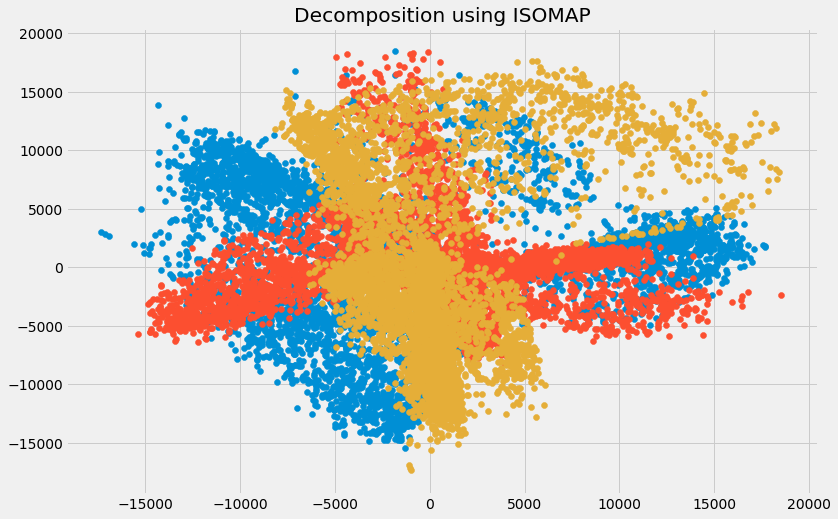

In [41]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])
plt.show()